In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

data_dir = 'data' 

image_exts = ['jpeg','jpg', 'bmp', 'png']

C:\Users\iftep\AppData\Local\Temp\ipykernel_12784\3737849390.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

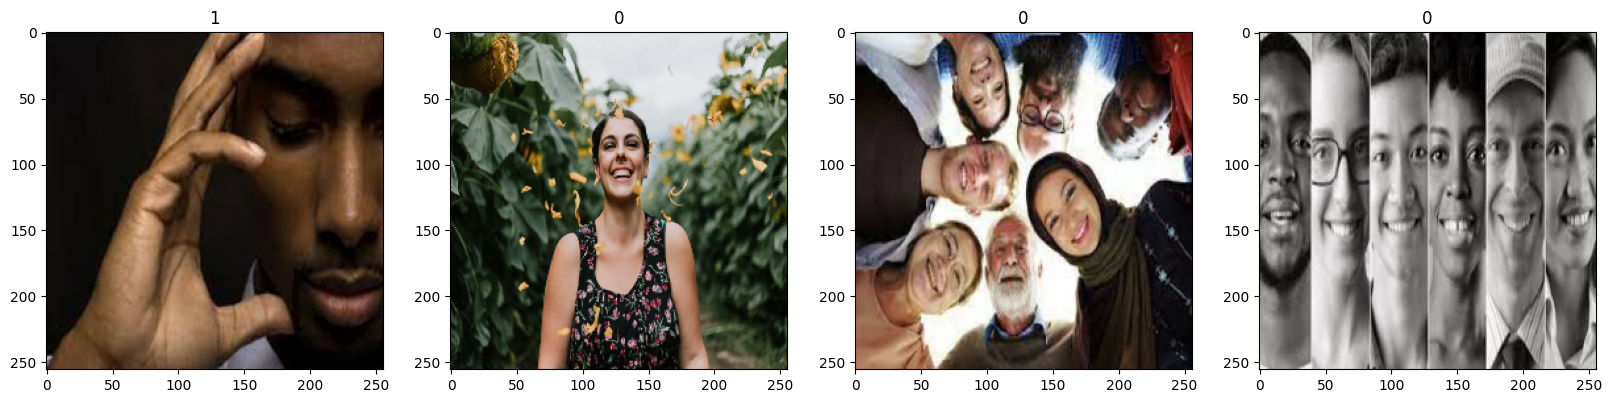

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [10]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.09019608, 0.09803922, 0.08627451],
          [0.09390318, 0.10174632, 0.08998162],
          [0.11075368, 0.11859681, 0.10683211],
          ...,
          [0.35186887, 0.34010416, 0.2734375 ],
          [0.3013174 , 0.2895527 , 0.22288603],
          [0.2901961 , 0.2784314 , 0.21176471]],
 
         [[0.09221814, 0.10006128, 0.08829657],
          [0.09572251, 0.10356565, 0.09180094],
          [0.1116515 , 0.11949463, 0.10772993],
          ...,
          [0.3744775 , 0.36223096, 0.2953721 ],
          [0.32721713, 0.31536555, 0.24811174],
          [0.31681985, 0.30505514, 0.23771445]],
 
         [[0.10140932, 0.10925245, 0.09748775],
          [0.10399218, 0.11183532, 0.10007061],
          [0.11573247, 0.12357561, 0.1118109 ],
          ...,
          [0.47724393, 0.46280733, 0.3950748 ],
          [0.4449432 , 0.43269664, 0.36277407],
          [0.437837  , 0.4260723 , 0.3556679 ]],
 
         ...,
 
         [[0.17141545, 0.202788  , 0.14396445],
          [0.16973

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [12]:
train_size

7

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [14]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [19]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 18s 2s/step - loss: 0.8583 - accuracy: 0.4554 - val_loss: 0.6983 - val_accuracy: 0.4531
Epoch 2/20
7/7 [==============================] - 16s 2s/step - loss: 0.6309 - accuracy: 0.6562 - val_loss: 0.5158 - val_accuracy: 0.7344
Epoch 3/20
7/7 [==============================] - 16s 2s/step - loss: 0.5174 - accuracy: 0.7589 - val_loss: 0.5445 - val_accuracy: 0.7031
Epoch 4/20
7/7 [==============================] - 16s 2s/step - loss: 0.3999 - accuracy: 0.8036 - val_loss: 0.2949 - val_accuracy: 0.9062
Epoch 5/20
7/7 [==============================] - 17s 2s/step - loss: 0.3382 - accuracy: 0.8839 - val_loss: 0.2443 - val_accuracy: 0.9219
Epoch 6/20
7/7 [==============================] - 17s 2s/step - loss: 0.2688 - accuracy: 0.8750 - val_loss: 0.1934 - val_accuracy: 0.9688
Epoch 7/20
7/7 [==============================] - 15s 2s/step - loss: 0.1885 - accuracy: 0.9464 - val_loss: 0.1872 - val_accuracy: 0.9688
Epoch 8/20
7/7 [==================

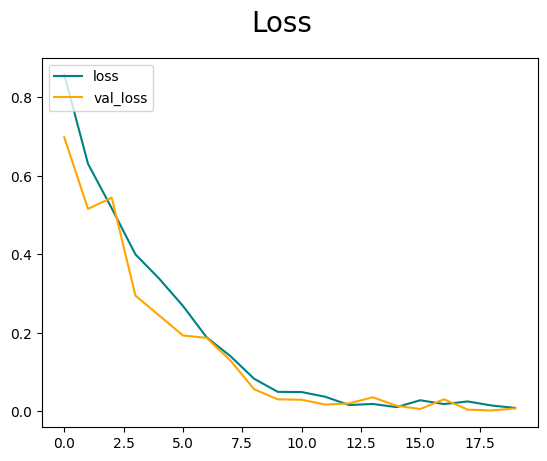

In [20]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

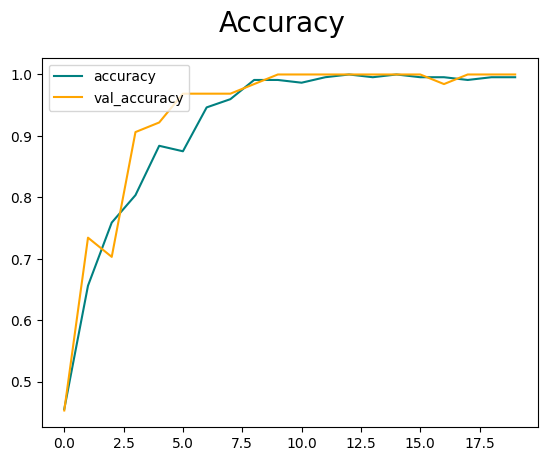

In [21]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [22]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [23]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [24]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 315ms/step


In [25]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [50]:
import cv2

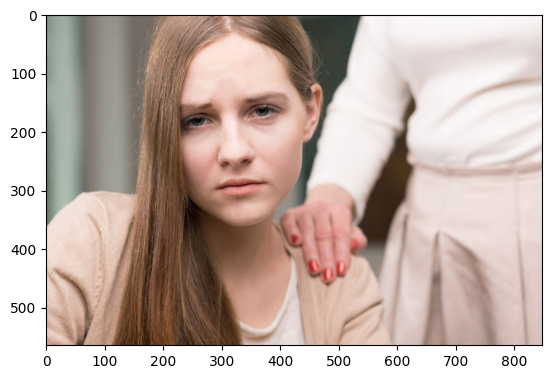

In [63]:
img = cv2.imread('./data/sad/51079685_M.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

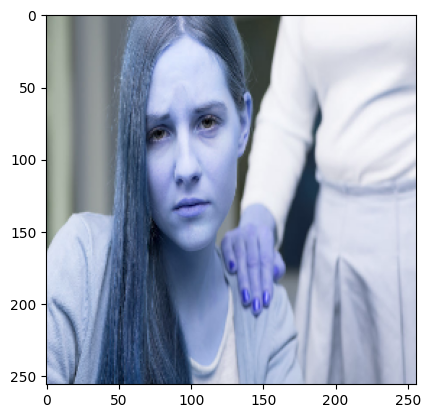

In [64]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 76ms/step


In [66]:
yhat

array([[0.991808]], dtype=float32)

In [67]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
